# Analyzing Public Investment with Lorenz curves

This notebook describes an approach to measuring equality in public investments. The proposed approach utilizes the well-known Lorenz curve graph, as well as the complementary Gini coefficient.

This notebook begins by providing some basic background on both the Lorenz curve and Gini coefficient. It then generates a straightforward example using Python code. The code is thoroughly annotated with comments. While having a programming background would obviously be useful, a careful reader of the code comments should be able get an understanding of each code line's purpose. 

## The Lorenz curve & Gini coefficient

Typically, the Lorenz curve is used to visualize the distribution of income or of wealth. It was created by Amercian economomist Max O. Lorenz in 1905 as a graphing approach for representing inequality of wealth distribution. The image below is an example of this use. In the image below, the "B" area represents that cumulative resources owned by the population. The established convention is that the X-axis goes from the most marginal group (e.g. the lowest income categorization) starting on the right and ends on the left with the most powerful group. 

The "A" area represents the area or "gap" between the line of perfect equality and the actual distribution. The Gini coefficient is the ratio of the area that lies between the line of equality and the Lorenz curve ("A") over the total area under the line of equality ("A" and "B").

<img src="images/lorenz_curve.png" width=400 align="right">


## Equitable Public Investment

While equitable public investment is an oft-mentioned goal of policymakers, it is not always the case that spending and/or capital project allocations are rigorously measured to ensure said goal is met. 

In the example below, we use both the Lorenz curve and Gini coefficient to create a plot of the distribution of investment accross a population. No specific investment type is identified - it could be transit service hours, infrastructure maintenance, park acreage, etc. The sample data is based on group categorization by ventiles (a "ventile" is one part of twenty). But this is not a requirement - you may choose your own quantile.

To illustrate the practical potential of the approach, a series of nine "small multiples" is created, each representing a hypothetical district/geography within a community. This allows for granularity about how economic marginality impacts investment in different spatial groupings in a community, as well as facilitating quick checks of broader patterns (e.g. the "North" part of the community features different investment distribution than the "South" part).

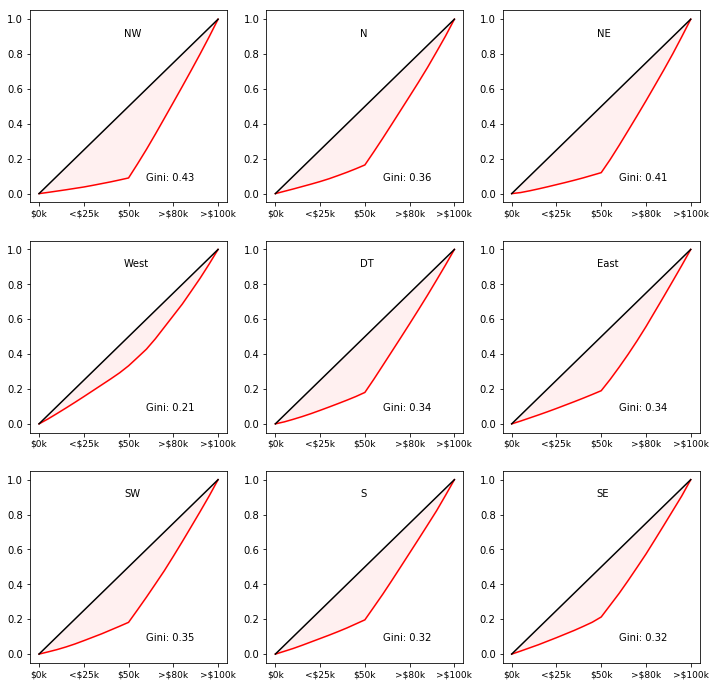

In [12]:
# These instructions tell the program creating this website what other 
# packaged programs we want to use.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# This function creats a random sample of 20 investment values based on a distribution type called "Poisson"
def generate_investment_sample():
    poisson_values = np.append(np.random.poisson(lam=np.random.randint(low=15, high=50, size=1), size=10), 
                               np.random.poisson(lam=np.random.randint(low=75, high=200, size=1), size=10))
    poisson_values.sort()
    return poisson_values

# This function scales the investment values so that they each represent the percentage or "share" 
# of the total investment values. This helps us correctly plot the Lorenz curve.
def lorenzify(values):
    scaled_shares = values.cumsum() / values.sum()
    # this prepends the 0 value as the starting point
    return np.insert(scaled_shares, 0, 0)

# This function calculates the gini coefficient. It borrows from the implementation created by
# Olivia Guest. See: https://github.com/oliviaguest/gini
def calculate_gini(values):
    values = np.sort(values)
    index = np.arange(1, values.shape[0] + 1)
    n = values.shape[0]
    gini_coefficient = ((np.sum((2 * index - n  - 1) * values)) / (n * np.sum(values)))
    return gini_coefficient

# These are the labels for our fictional community districts/geographies
district_labels = ['NW', 'N', 'NE', 'West', 'DT', 'East', 'SW', 'S', 'SE']
district_labels.reverse()

# The following creates the small multiples one-by-one through a loop and sub-loop, finishing with
# the creation of an image.  
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(12, 12))
for axis_row in axes:
    for axis in axis_row:
        
        # Generage sample data
        investments = generate_investment_sample()
        
        # Now, turn those numbers into shares of the total
        lorenz_curve = lorenzify(investments)
        
        # Also, let's get the Gini coefficient to place it in the chart
        gini_coefficient = calculate_gini(investments)
        
        # We setup the X-axis ticks and create some "pretend" values for the income bands of the ticks.
        # In your implementation, you might choose a different number of ticks or a different grouping
        # metric, such as wealth instead of income.
        x_values = np.linspace(0.0, 1.0, lorenz_curve.size)
        axis.set_xticks([0.0, 0.25, 0.5, 0.75, 1])
        axis.set_xticklabels(["$0k", "<$25k", "$50k", ">$80k", ">$100k"], fontdict={'fontsize': 9})
        
        # We plot the observed distribution in red 
        axis.plot(x_values, lorenz_curve, color='red')
        
        # And then plot the straight line perfect equality curve
        axis.plot([0,1], [0,1], color='black')
        
        # We fill the Gini coefficient area in red
        axis.fill_between(x_values, lorenz_curve, x_values, color='#fff0f0')
        
        # This adds the district label
        axis.text(0.475, 0.9, district_labels.pop())
        
        # And this adds the Gini coefficient
        axis.text(0.6, 0.075, 'Gini: {:0.2f}'.format(gini_coefficient))
        
plt.show()